In [1]:
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr
# from pythia_datasets import DATASETS  # conda install -c conda-forge pythia-datasets

In [2]:
import pathlib

In [3]:
! dir ..\..\data

 Volume in drive D is New Volume
 Volume Serial Number is 3005-EA25

 Directory of D:\project\ARM\data

07/17/2022  11:49 AM    <DIR>          .
07/17/2022  11:49 AM    <DIR>          ..
07/14/2022  04:02 PM        99,680,952 adaptor.mars.internal-1657839523.6804938-19499-14-7b1bda5f-c80d-4ab4-a664-a3048e1c5a95.nc
07/17/2022  10:22 AM         1,238,472 grwarealavealbM1.c1.20101223.060000.nc
07/17/2022  11:49 AM         1,238,472 grwarealavealbM1.c1.20101225.060000.nc
06/22/2022  10:34 AM    <DIR>          sgpaerioe1turnC1.c1
06/22/2022  10:59 AM    <DIR>          sgpaerioe1turnE39.c1
07/14/2022  04:02 PM        99,680,952 test.nc
               4 File(s)    201,838,848 bytes
               4 Dir(s)  344,079,429,632 bytes free


In [4]:
f_path = pathlib.Path("../../data/grwarealavealbM1.c1.20101225.060000.nc")
ds = xr.open_dataset(f_path)
ds

<xarray.Dataset>
Dimensions:                             (time: 4319, bound: 2, filter: 5)
Coordinates:
  * time                                (time) datetime64[ns] 2010-12-25T06:0...
  * filter                              (filter) float32 415.0 500.0 ... 870.0
Dimensions without coordinates: bound
Data variables: (12/40)
    base_time                           datetime64[ns] ...
    time_offset                         (time) datetime64[ns] ...
    time_bounds                         (time, bound) datetime64[ns] ...
    cosine_solar_zenith_angle           (time) float32 ...
    qc_cosine_solar_zenith_angle        (time) int32 ...
    cloudfraction                       (time) float32 ...
    ...                                  ...
    qc_screened_areal_ave_albedo        (time, filter) int32 ...
    normalized_transmittance            (time, filter) float32 ...
    qc_normalized_transmittance         (time, filter) int32 ...
    lat                                 float32 ...
    lon                                 float32 ...
    alt                                 float32 ...
Attributes: (12/22)
    command_line:          idl -R -s grw -f M1 -n arealavealb -b 20090505 -e ...
    Conventions:           ARM-1.0
    process_version:       $State $
    dod_version:           arealavealb-c1-1.0
    input_datastreams:     grwmfrsrcldod1minM1.c1 : 1.2 : 20101225.000000-201...
    site_id:               grw
    ...                    ...
    qc_bit_3_description:  Value is greater than the valid_max.
    qc_bit_3_assessment:   Bad
    qc_bit_4_description:  Difference between current and previous values exc...
    qc_bit_4_assessment:   Indeterminate
    doi:                   10.5439/1209102
    history:               created by user marinovici on machine copper at 20...

In [5]:
ds.keys()
ds.data_vars

Data variables:
    base_time                           datetime64[ns] 2010-12-25
    time_offset                         (time) datetime64[ns] 2010-12-25T06:0...
    time_bounds                         (time, bound) datetime64[ns] 2010-12-...
    cosine_solar_zenith_angle           (time) float32 -0.5846 ... -0.5867
    qc_cosine_solar_zenith_angle        (time) int32 0 0 0 0 0 0 ... 0 0 0 0 0 0
    cloudfraction                       (time) float32 nan nan nan ... nan nan
    qc_cloudfraction                    (time) int32 1 1 1 1 1 1 ... 1 1 1 1 1 1
    lwp                                 (time) float32 0.052 0.04 ... 0.03484
    qc_lwp                              (time) int32 0 0 0 0 0 0 ... 0 0 0 0 0 0
    ir_temp                             (time) float32 252.9 251.7 ... 233.1
    qc_ir_temp                          (time) int32 0 0 0 0 0 0 ... 0 0 0 0 0 0
    cloudbasebestestimate               (time) float32 819.9 1.28e+03 ... nan
    qc_cloudbasebestestimate            (time

In [6]:
# from Krista's notes, things to plot (mostly 1d)
# Plot 1 is cloud_optical_depth(time,filter) vs time

#                 Note each filter is plotted independent (i.e. plot 1 filer, than overlay filter2, overlay filter3, etc)

# Plot 1 is cloudfraction(time) vs time

# Plot 1 is lwp(time) vs time

# Plot 4 is cloudbasebestestimate(time)

# Plot 5 is irt_temp(time) vs time

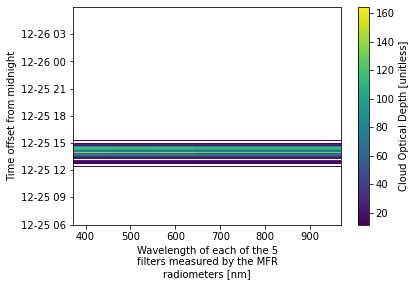

In [7]:
ds.cloud_optical_depth.plot()                

In [8]:
ds.cloud_optical_depth

<xarray.DataArray 'cloud_optical_depth' (time: 4319, filter: 5)>
array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-12-25T06:00:00 ... 2010-12-26T05:59:40
  * filter   (filter) float32 415.0 500.0 615.0 673.0 870.0
Attributes:
    long_name:            Cloud Optical Depth
    units:                unitless
    comment_for_laura:    do you want to set min/max for this???
    ancillary_variables:  qc_cloud_optical_depth

In [9]:
ds.cloud_optical_depth.shape

(4319, 5)

In [10]:
ds.cloud_optical_depth[:, 0]
ds.cloud_optical_depth[:, 0].values.any()

True

In [11]:
ds.cloud_optical_depth.time

<xarray.DataArray 'time' (time: 4319)>
array(['2010-12-25T06:00:00.000000000', '2010-12-25T06:00:20.000000000',
       '2010-12-25T06:00:40.000000000', ..., '2010-12-26T05:59:00.000000000',
       '2010-12-26T05:59:20.000000000', '2010-12-26T05:59:40.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2010-12-25T06:00:00 ... 2010-12-26T05:59:40
Attributes:
    long_name:  Time offset from midnight
    bounds:     time_bounds

In [12]:
ds.cloud_optical_depth.filter

<xarray.DataArray 'filter' (filter: 5)>
array([415., 500., 615., 673., 870.], dtype=float32)
Coordinates:
  * filter   (filter) float32 415.0 500.0 615.0 673.0 870.0
Attributes:
    long_name:  Wavelength of each of the 5 filters measured by the MFR radio...
    units:      nm

In [13]:
from matplotlib import pyplot as plt

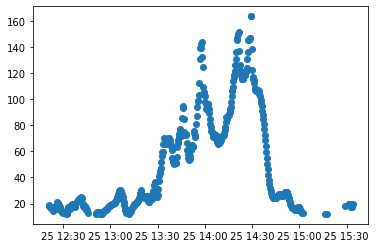

In [14]:
plt.scatter(x=ds.cloud_optical_depth.time, y=ds.cloud_optical_depth[:, 0])

In [45]:
# parse to pandas for easy to manipulate for plotting
# 415., 500., 615., 673., 870
# df_cloud_optical_depth = pd.DataFrame([ds.cloud_optical_depth[:, 0].values, ds.cloud_optical_depth[:, 1].values])
df_cloud_optical_depth = pd.DataFrame(ds.cloud_optical_depth.values)
df_cloud_optical_depth.index = ds.cloud_optical_depth.time
df_cloud_optical_depth.columns = ["filter_415", "filter_500", "filter_615", "filter_673", "filter_870"]
df_cloud_optical_depth.head()

,filter_415,filter_500,filter_615,filter_673,filter_870
2010-12-25 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-12-25 06:00:20,NaN,NaN,NaN,NaN,NaN
2010-12-25 06:00:40,NaN,NaN,NaN,NaN,NaN
2010-12-25 06:01:00,NaN,NaN,NaN,NaN,NaN
2010-12-25 06:01:20,NaN,NaN,NaN,NaN,NaN


In [15]:
# from pandas import DatetimeIndex

In [22]:
# display notna value
df_cloud_optical_depth[df_cloud_optical_depth.filter_415.notna()]

,filter_415,filter_500,filter_615,filter_673,filter_870
2010-12-25 12:20:40,19.177666,18.985889,19.273554,18.410559,18.410559
2010-12-25 12:21:00,18.177551,17.995775,18.268438,17.450449,17.450449
2010-12-25 12:21:20,17.628225,17.451942,17.716366,16.923096,16.923096
2010-12-25 12:21:40,17.222992,17.050762,17.309107,16.534071,16.534071
2010-12-25 12:22:00,16.701063,16.534052,16.784567,16.033020,16.033020
...,...,...,...,...,...
2010-12-25 15:32:40,17.273886,17.101147,17.360254,16.582930,16.582930
2010-12-25 15:33:00,17.172829,17.001101,17.258692,16.485914,16.485914
2010-12-25 15:33:20,17.502281,17.327259,17.589792,16.802191,16.802191
2010-12-25 15:33:40,18.805927,18.617868,18.899958,18.053690,18.053690


<AxesSubplot:>

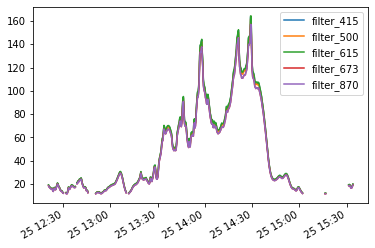

In [23]:
# fast ploting (native pandas plot)
df_cloud_optical_depth.plot()

In [26]:
import seaborn as sns

In [ ]:
# TODO:
# confirm lable names, e.g., filter_415 might have other name,like, qc_optfcal depth average indt, 
# confirm legend style, including palette style
# confirm if using dynamic range (i.e., y range) is okay, if not, what should be the (static) range.

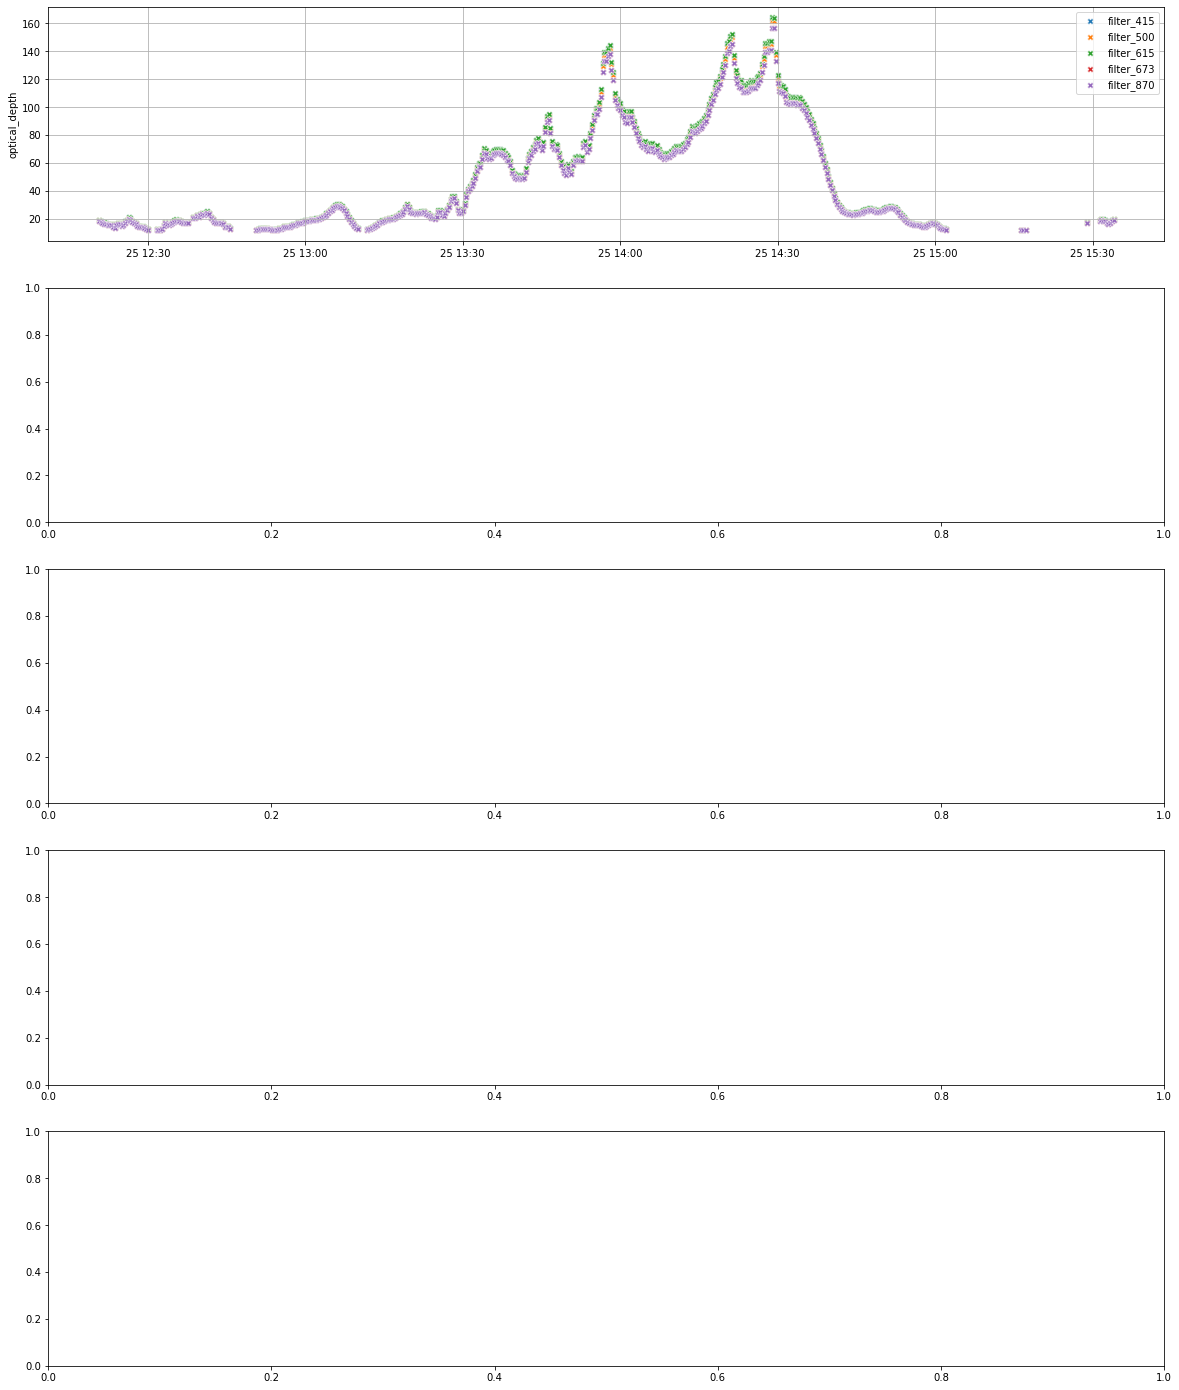

In [42]:
# create the time series plot
n_plots = 5 # (place holder)
fig, axes = plt.subplots(nrows=n_plots, ncols=1,figsize=(20*1,5*n_plots))  # TODO: confirm the image style guide

# plot no.1 
df_p = df_cloud_optical_depth
ax = axes[0]
for col in df_p.columns:
    sns.scatterplot(x = df_p.index, y = col , data = df_p, marker= 'X', label=col, ax=ax)
ax.set_ylabel("optical_depth")
ax.legend(loc='upper right')
ax.grid()
plt.show()

# TODO
# modify the size of the label and legends (e.g., a bit small for now)
# modify the xaxis lable (e.g., position, using shared is okay, e.g., get rid of the leading date number )

In [43]:
# similar idea finish the rest of the plot

<AxesSubplot:>

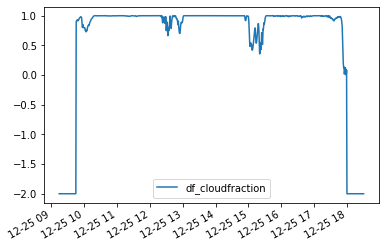

In [50]:
# cloudfraction plot
ds.cloudfraction
df_cloudfraction = pd.DataFrame(ds.cloudfraction.values)
df_cloudfraction.index = ds.cloudfraction.time
df_cloudfraction.columns = ["cloudfraction"]
df_cloudfraction.head()
df_cloudfraction.plot()

<AxesSubplot:>

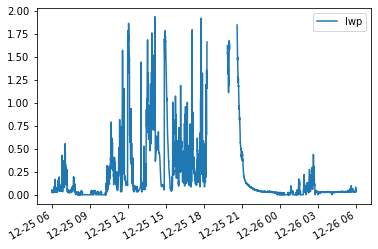

In [53]:
# lwp plot
ds.lwp
df_lwp = pd.DataFrame(ds.lwp.values)
df_lwp.index = ds.lwp.time
df_lwp.columns = ["lwp"]
df_lwp.head()
df_lwp.plot()

<AxesSubplot:>

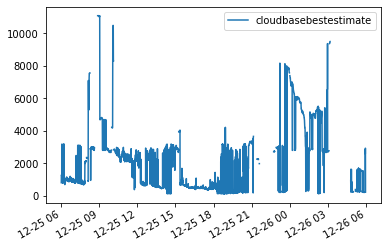

In [67]:
# cloudbasebestestimate plot
ds.cloudbasebestestimate
df_cloudbasebestestimate = pd.DataFrame(ds.cloudbasebestestimate.values)
df_cloudbasebestestimate.index = ds.cloudbasebestestimate.time
df_cloudbasebestestimate.columns = ["cloudbasebestestimate"]
df_cloudbasebestestimate.head()
df_cloudbasebestestimate.plot()

<AxesSubplot:>

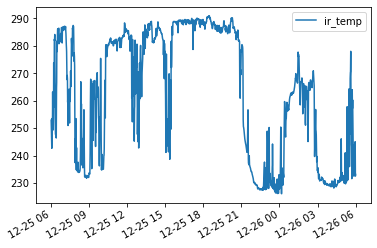

In [68]:
# ir_temp plot
ds.ir_temp
df_ir_temp = pd.DataFrame(ds.ir_temp.values)
df_ir_temp.index = ds.ir_temp.time
df_ir_temp.columns = ["ir_temp"]
df_ir_temp.head()
df_ir_temp.plot()

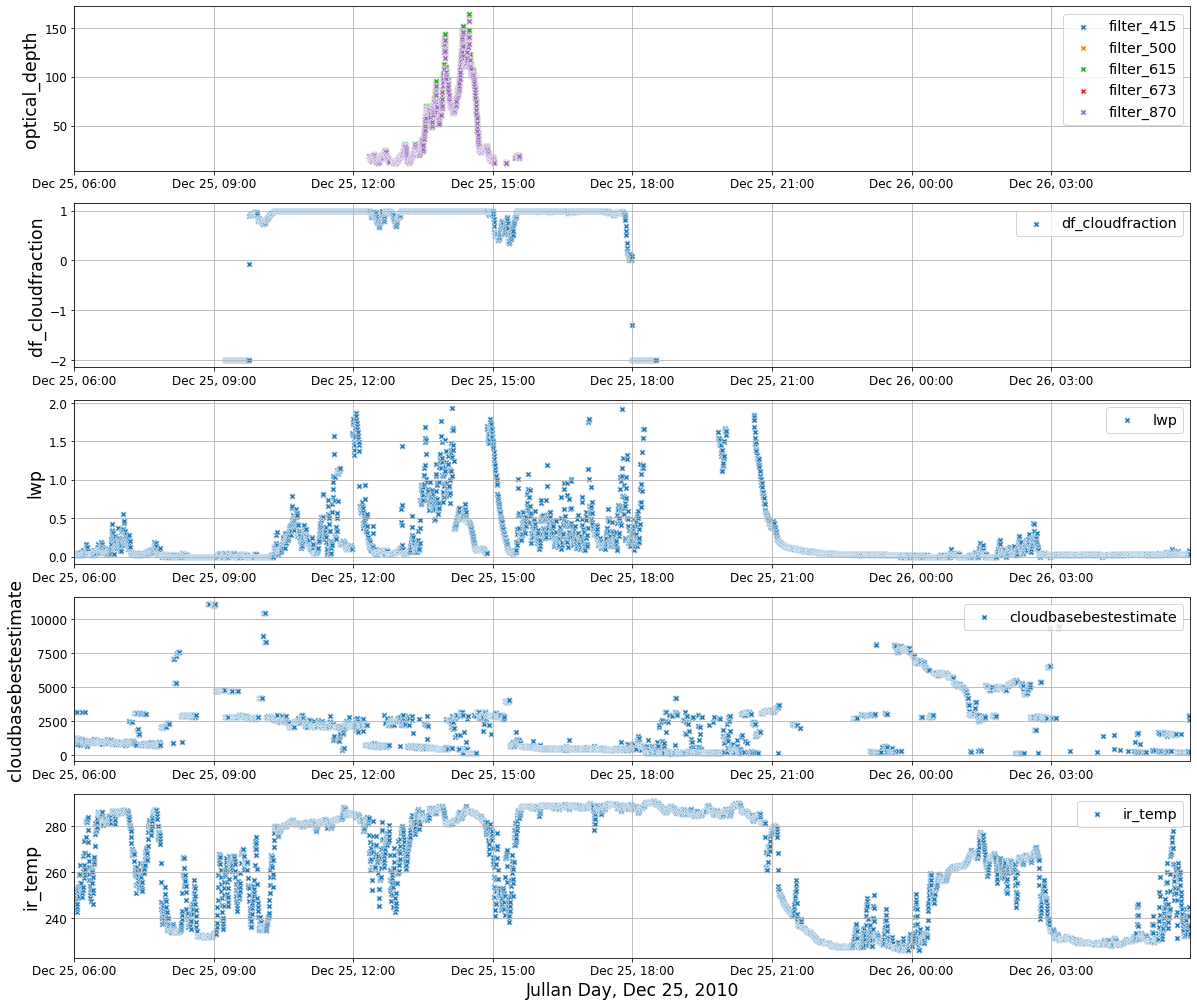

In [140]:
# create the time series plot
# note the time range are different across variables
n_plots = 5 # (place holder)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(20*1,3.5*n_plots), 
                         sharex=True
                        )  # TODO: confirm the image style guide
dfs_to_plot = [df_cloud_optical_depth, 
               df_cloudfraction,
               df_lwp,
               df_cloudbasebestestimate,
               df_ir_temp
              ]

# plot no.0 
df_p = df_cloud_optical_depth
ax = axes[0]
for col in df_p.columns:
    sns.scatterplot(x = df_p.index, y = col , data = df_p, marker= 'X', label=col, ax=ax)
ax.set_ylabel("optical_depth", fontsize='xx-large')
ax.legend(loc='upper right')
ax.grid()
ax.xaxis.set_tick_params(which='both', labelbottom=True)  # switch on/off to see xtick at every graph

# # plot no.1 
# df_p = df_cloudfraction
# ax = axes[1]
# for col in df_p.columns:
#     sns.scatterplot(x = df_p.index, y = col , data = df_p, marker= 'X', label=col, ax=ax)
# ax.set_ylabel("cloudfraction")
# ax.legend(loc='upper right')
# ax.grid()

# plot no.1-4 
for i in range(1, 4+1):
    df_p = dfs_to_plot[i]
    ax = axes[i]
    col = df_p.columns[0]  # hard-coded, I know there is only one column, i.e., 1d
    sns.scatterplot(x = df_p.index, y = col , data = df_p, marker= 'X', label=col, ax=ax)
    ax.set_ylabel(col, fontsize='xx-large')
    ax.legend(loc='upper right')
    ax.grid()
    ax.xaxis.set_tick_params(which='both', labelbottom=True)


# set shared (x) range
x_min = min([df.index.min() for df in dfs_to_plot])
x_max = max([df.index.max() for df in dfs_to_plot])
# x_max = max([df_cloud_optical_depth.index.max(), df_cloudfraction.index.max(), df_lwp.index.max()])
plt.xlim([x_min, x_max])

plt.xlabel("Jullan Day, Dec 25, 2010", fontsize='xx-large')

# overall formatting
# format x-axis to display
from matplotlib.dates import DateFormatter
date_form = DateFormatter('%b %d, %R')
ax.xaxis.set_major_formatter(date_form)

# lengend size
for ax in axes:
    ax.legend(loc='upper right', fontsize="x-large") # using a named size
    
# fontsize
plt.rc('xtick', labelsize='large')    # fontsize of the tick labels
plt.rc('ytick', labelsize='large')    # fontsize of the tick labels

# plt.rc('xtick', labelsize=15)    # fontsize of the tick labels

plt.savefig('arealavealb_python.png', transparent=False, facecolor='w')

plt.show()





In [ ]:
# # ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# import matplotlib.pyplot as plt

# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [134]:
plt.savefig('arealavealb_python.png')

<Figure size 432x288 with 0 Axes>